In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [ ]:
water_data= pd.read_csv('/content/drive/MyDrive/Water_Quality_Dataset/water_quality.csv')

In [ ]:
water_data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
water_data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


In [ ]:
water_data.shape

(3276, 10)

In [ ]:
water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
water_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
water_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
water_data['ph'].fillna(water_data['ph'].mode(), inplace=True)

In [ ]:
water_data['Sulfate'].fillna(water_data['Sulfate'].mode(), inplace=True)


In [ ]:
water_data['Trihalomethanes'].fillna(water_data['Trihalomethanes'].mode(), inplace=True)

In [ ]:
water_data.isnull().sum()

ph                  65
Hardness             0
Solids               0
Chloramines          0
Sulfate            198
Conductivity         0
Organic_carbon       0
Trihalomethanes      7
Turbidity            0
Potability           0
dtype: int64

In [ ]:
water_data.dropna(inplace = True)

In [ ]:
water_data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.073546,-0.072102,-0.026261,0.063919,0.011440,0.029681,0.008028,-0.034639,0.021105
Hardness,0.073546,1.000000,-0.043753,-0.007834,-0.107853,-0.010009,0.004045,-0.009534,-0.025290,-0.013547
Solids,-0.072102,-0.043753,1.000000,-0.075168,-0.133952,0.007726,0.010430,-0.003948,0.017453,0.030630
Chloramines,-0.026261,-0.007834,-0.075168,1.000000,0.019461,-0.026439,-0.012763,0.020067,0.005258,0.022761
Sulfate,0.063919,-0.107853,-0.133952,0.019461,1.000000,-0.017806,0.017272,-0.012869,-0.004721,0.001577
Conductivity,0.011440,-0.010009,0.007726,-0.026439,-0.017806,1.000000,0.032167,-0.000832,0.010878,-0.016594
Organic_carbon,0.029681,0.004045,0.010430,-0.012763,0.017272,0.032167,1.000000,-0.014785,-0.029307,-0.019306
Trihalomethanes,0.008028,-0.009534,-0.003948,0.020067,-0.012869,-0.000832,-0.014785,1.000000,-0.020466,0.004839
Turbidity,-0.034639,-0.025290,0.017453,0.005258,-0.004721,0.010878,-0.029307,-0.020466,1.000000,0.012476
Potability,0.021105,-0.013547,0.030630,0.022761,0.001577,-0.016594,-0.019306,0.004839,0.012476,1.000000


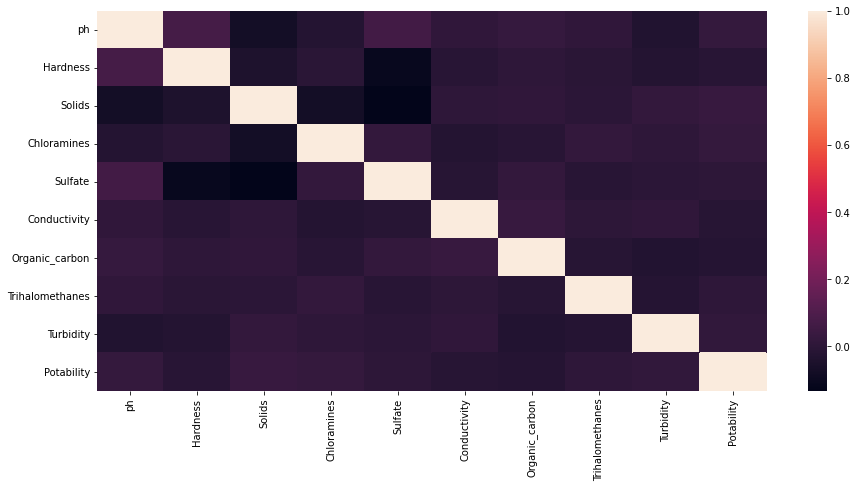

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(water_data.corr())

In [ ]:
water_data.Potability.unique()

array([0, 1])

In [ ]:
water_data.Potability.value_counts()

0    1853
1    1173
Name: Potability, dtype: int64

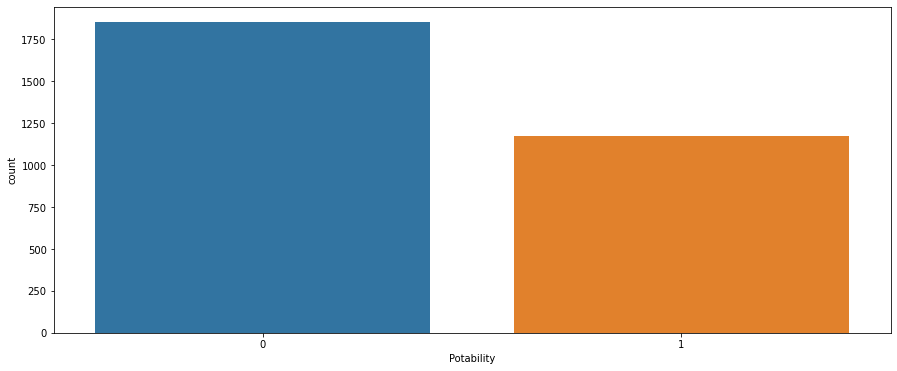

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('Potability', data = water_data)
plt.xticks(rotation = 0)
plt.show()

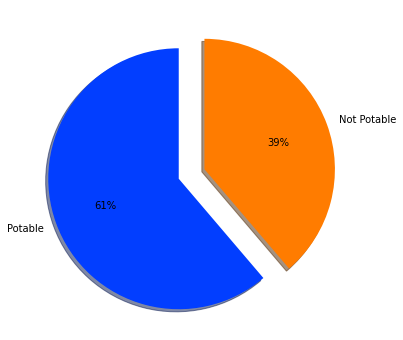

In [ ]:
plt.figure(figsize=(15,6))
explode = [0.2,0.01]
colors = sns.color_palette('bright')
plt.pie(water_data['Potability'].value_counts(), labels=['Potable', 'Not Potable'],
colors = colors, autopct = '%0.0f%%', explode = explode, shadow = 'True',
startangle = 90)
plt.show()

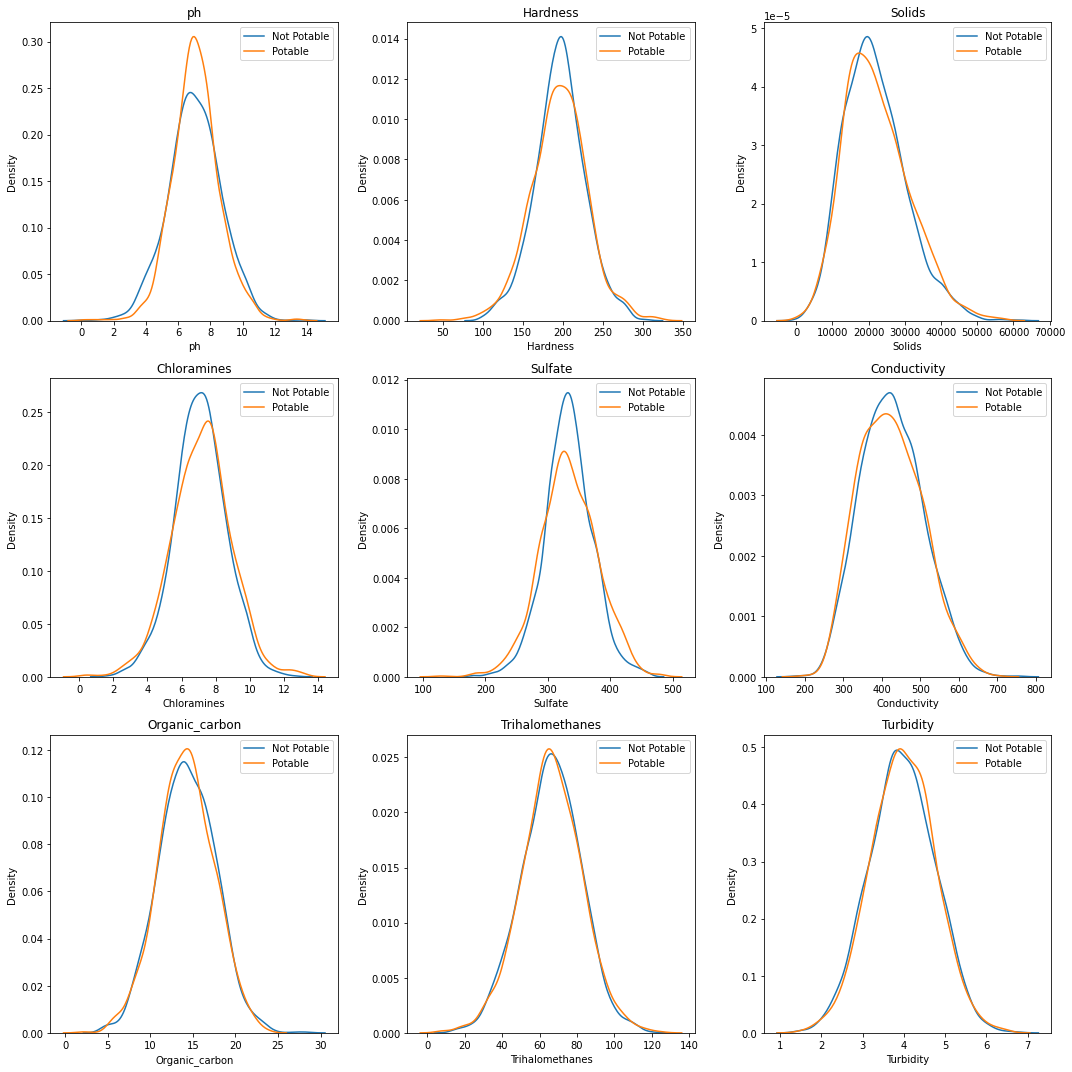

In [ ]:
not_potable = water_data.query("Potability == 0")
potable = water_data.query("Potability == 1")
plt.figure(figsize = (15, 15))
for ax, col in enumerate(water_data.columns[:9]):
 plt.subplot(3, 3, ax + 1)
 plt.title(col)
 sns.kdeplot(x = not_potable[col], label = "Not Potable")
 sns.kdeplot(x = potable[col], label = "Potable")
 plt.legend()
plt.tight_layout()

In [ ]:
x = water_data.drop("Potability", axis = 1).values
y = water_data["Potability"].values

In [ ]:
x.shape

(3026, 9)

In [ ]:
y.shape

(3026,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)


In [ ]:
classifier.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)


In [ ]:
print("Training Accuracy :", classifier.score(x_train, y_train))
print("Testing Accuracy :", classifier.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.5891089108910891


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[235, 116],
       [133, 122]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier1= RandomForestClassifier(n_estimators= 10, criterion="entropy")

In [ ]:
classifier1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred = classifier1.predict(x_test)

In [ ]:
print("Training Accuracy :", classifier1.score(x_train, y_train))
print("Testing Accuracy :", classifier1.score(x_test, y_test))


Training Accuracy : 0.978099173553719
Testing Accuracy : 0.6155115511551155


In [ ]:
cm=confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[299,  52],
       [181,  74]])